## Group members:
#### CHEN Yibing; LIU Wenyan; LI Xuan; WU Zichong

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import pandas_datareader.data as web
import scipy.stats as stats
import openpyxl
import matplotlib.image as mpimg

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Question 1: Cross-sectional regression on three models

In [3]:
### Model 1

### Get data with at least 30 firms
DF1 = pd.read_csv(r'D:\SMU\604 Group work\GPEX1set1.csv')

def get_more_than_30(DF):
    counts = DF['Date'].value_counts()
    dates_with_more_than_30_data = counts[counts >= 30].index
    filtered_df = DF['Date'].isin(dates_with_more_than_30_data)
    DF = DF[filtered_df]
    return DF

DF1 = get_more_than_30(DF1)

DF1['Return'] = DF1['Return']/100

### Do cross-sectional regression for one month
def get_question1_params_for_one_row_1(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[["LogSize_-1","LogB/M_-1","Return_-2,-12"]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.params) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

# ### Do cross-sectional regression for each month, extend a dataframe as the answer
Columns = ['Data','Constant','LogSize_-1','LogB/M_-1','Return_-2,-12','Adj Rsqr','Number of Firms or Obs']


for i in np.unique(DF1['Date']):
    date=i
    df_i = get_question1_params_for_one_row_1(DF1, date, columns = Columns)
    
    if i == np.unique(DF1['Date'])[0]:
        question1_params_for_model = df_i
    else:
        question1_params_for_model = pd.concat([question1_params_for_model, df_i], ignore_index=True)

## The answer for Question 1 model 1
question1_params_for_model_1 = question1_params_for_model
question1_params_for_model_1.tail(20)

,Data,Constant,LogSize_-1,LogB/M_-1,"Return_-2,-12",Adj Rsqr,Number of Firms or Obs
628,2019-08-31,-0.036783,-0.001712,-0.001916,0.053777,0.015879,3702
629,2019-09-30,-0.013596,0.008546,0.030158,-0.038796,0.067908,3685
630,2019-10-31,-0.019680,0.004526,-0.000637,0.029990,0.015054,3612
631,2019-11-30,-0.002562,0.003886,-0.013128,-0.036935,0.008890,3629
632,2019-12-31,0.064604,-0.001202,0.017621,-0.020152,0.013839,3614
633,2020-01-31,0.061434,-0.015367,-0.027279,-0.000291,0.022052,3577
634,2020-02-29,-0.033240,-0.007448,-0.005352,-0.007484,0.004634,3564
635,2020-03-31,-0.252737,-0.002991,-0.050584,0.005838,0.046268,3546
636,2020-04-30,0.256116,-0.013799,-0.010500,-0.037973,0.016429,3696
637,2020-05-31,0.094314,-0.008170,-0.033578,-0.011722,0.025951,3620


In [4]:
### Model 2

### Get data with at least 30 firms
DF2 = pd.read_csv(r'D:\SMU\604 Group work\GPEX1set2.csv')

def get_more_than_30(DF):
    counts = DF['Date'].value_counts()
    dates_with_more_than_30_data = counts[counts >= 30].index
    filtered_df = DF['Date'].isin(dates_with_more_than_30_data)
    DF = DF[filtered_df]
    return DF

DF2 = get_more_than_30(DF2)

DF2['Return'] = DF2['Return']/100

### Do cross-sectional regression for one month
def get_question1_params_for_one_row_2(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[['LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.params) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

# ### Do cross-sectional regression for each month, extend a dataframe as the answer
Columns = ['Date', 'Constant','LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'Adj Rsqr','Number of Firms or Obs']

for i in np.unique(DF2['Date']):
    date=i
    df_i = get_question1_params_for_one_row_2(DF2, date, columns = Columns)
    
    if i == np.unique(DF2['Date'])[0]:
        question1_params_for_model = df_i
    else:
        question1_params_for_model = pd.concat([question1_params_for_model, df_i], ignore_index=True)

## The answer for Question 1 model 2
question1_params_for_model_2 = question1_params_for_model
question1_params_for_model_2.tail(20)

,Date,Constant,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,Adj Rsqr,Number of Firms or Obs
599,2019-08-31,-0.038108,-0.003056,-0.011633,0.042061,-0.010557,-8.738292e-06,0.001776,-0.020377,0.019377,2238
600,2019-09-30,0.020724,0.003928,0.023133,-0.061665,-0.025586,4.477874e-06,0.115217,-0.015797,0.107386,2222
601,2019-10-31,-0.024871,0.005969,0.000680,0.029154,-0.003850,1.244661e-05,-0.043082,-0.006038,0.011132,2181
602,2019-11-30,-0.023209,0.007495,-0.011787,-0.045643,-0.009626,1.533836e-05,-0.158941,0.023251,0.029838,2188
603,2019-12-31,0.014245,0.007614,0.030181,-0.006823,0.008050,-5.813007e-06,-0.098490,-0.006528,0.032423,2175
604,2020-01-31,0.039930,-0.015213,-0.033812,0.018844,0.006028,-9.869818e-06,0.013898,-0.008437,0.049973,2154
605,2020-02-29,-0.020691,-0.009133,-0.007296,-0.021123,-0.032149,-3.796644e-06,-0.109262,0.056489,0.012921,2160
606,2020-03-31,-0.277499,0.004159,-0.039177,0.021349,0.038635,2.967986e-05,-0.008433,-0.023924,0.051524,2148
607,2020-04-30,0.236999,-0.009323,0.013630,-0.007664,-0.059071,-2.732032e-05,-0.271140,0.172985,0.052778,2163
608,2020-05-31,0.065552,-0.002381,-0.019249,-0.021186,0.029225,9.908234e-06,-0.151483,0.026061,0.035344,2125


In [5]:
### Model 3

DF3 = pd.read_csv(r'D:\SMU\604 Group work\GPEX1set3.csv')

def get_more_than_30(DF):
    counts = DF['Date'].value_counts()
    dates_with_more_than_30_data = counts[counts >= 30].index
    filtered_df = DF['Date'].isin(dates_with_more_than_30_data)
    DF = DF[filtered_df]
    return DF

DF3 = get_more_than_30(DF3)

DF3['Return'] = DF3['Return']/100

### Do cross-sectional regression for one month
def get_question1_params_for_one_row_3(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[['LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.params) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

# ### Do cross-sectional regression for each month, extend a dataframe as the answer
Columns = ['Date', 'Constant','LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1','Adj Rsqr','Number of Firms or Obs']


for i in np.unique(DF3['Date']):
    date=i
    df_i = get_question1_params_for_one_row_3(DF3, date, columns = Columns)
    
    if i == np.unique(DF3['Date'])[0]:
        question1_params_for_model = df_i
    else:
        question1_params_for_model = pd.concat([question1_params_for_model, df_i], ignore_index=True)

## The answer for Question 1 model 3
question1_params_for_model_3 = question1_params_for_model
question1_params_for_model_3.tail(20)

,Date,Constant,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1,Adj Rsqr,Number of Firms or Obs
595,2019-08-31,-0.026077,-0.001105,-0.016201,0.016719,-0.018708,-0.000007,-0.017979,0.008421,-0.064278,-0.021915,-0.008952,-8.870083e-08,-0.008829,-0.000960,0.030507,2084
596,2019-09-30,0.017436,0.001711,0.009929,-0.066756,-0.034071,0.000009,0.091569,-0.005186,0.424443,-0.013981,-0.040349,2.423544e-08,0.002316,0.004073,0.133473,2060
597,2019-10-31,-0.031521,0.005931,0.010026,0.044033,0.013546,0.000008,-0.060105,-0.029419,-0.087498,0.030401,-0.071928,2.705097e-08,-0.006677,0.003292,0.030128,2039
598,2019-11-30,-0.009790,0.005450,-0.007184,-0.034318,-0.003257,0.000009,-0.134051,0.026054,-0.274361,0.008453,-0.016728,3.927101e-08,-0.001249,-0.000844,0.032964,2031
599,2019-12-31,0.042754,0.003701,0.031870,-0.006255,-0.026794,-0.000007,-0.085119,-0.008555,-0.121144,-0.002449,0.075486,5.867450e-08,0.010921,-0.007308,0.039457,2018
600,2020-01-31,0.054868,-0.011588,-0.026155,0.013172,0.007758,-0.000011,-0.010959,-0.012424,-0.275433,0.002134,-0.012574,-1.317629e-07,-0.017242,-0.000449,0.061992,2006
601,2020-02-29,-0.013502,-0.011005,-0.007126,-0.005188,0.001564,-0.000011,-0.039187,0.015483,-0.171546,0.010377,-0.016599,4.996392e-08,-0.009741,-0.001213,0.013124,2004
602,2020-03-31,-0.240332,0.011097,-0.021928,-0.008646,0.028043,0.000022,-0.035173,-0.010573,-0.523013,-0.000672,0.065230,-2.690584e-07,-0.048845,0.000035,0.103305,1967
603,2020-04-30,0.167073,-0.009077,0.007770,0.030060,0.011475,-0.000019,-0.112447,0.067116,-0.228332,-0.007711,0.005799,3.238332e-07,0.014184,0.002158,0.074427,1913
604,2020-05-31,0.056348,-0.001468,-0.017762,-0.016206,0.010457,0.000007,-0.126674,0.003764,-0.708178,0.006577,0.127718,5.767706e-08,-0.002050,0.003692,0.048855,1910


## Question 2

In [6]:
### Model 1

### Get SDE first (Standard Error)
def get_question2_SDE_for_one_row_1(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[["LogSize_-1","LogB/M_-1","Return_-2,-12"]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.bse) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

Columns = ['Data','Constant','LogSize_-1','LogB/M_-1','Return_-2,-12','Adj Rsqr','Number of Firms or Obs']


for i in np.unique(DF3['Date']):
    date=i
    df_i = get_question2_SDE_for_one_row_1(DF3, date, columns = Columns)
    
    if i == np.unique(DF3['Date'])[0]:
        question2_SDE = df_i
    else:
        question2_SDE = pd.concat([question2_SDE, df_i], ignore_index=True)
        
### Get average coefficients and sde
col_means_coefficients = question1_params_for_model_1.mean()
col_means_SDE = question2_SDE.mean()

### Do t-tests
def get_everything_for_Q2(column_name):
    
    Columns = ['Sample mean', 'Standard error', 't-statistic', 'p-value']

    # Define the sample data
    sample_data = question1_params_for_model_1[column_name]

    # Define the null hypothesis mean (typically 0)
    null_mean = 0

    # Calculate the sample mean and standard error
    sample_mean = sum(sample_data) / len(sample_data)
    
    #std_err = stats.sem(sample_data)
    std_err = question2_SDE[column_name].mean()

    # Calculate the t-statistic and p-value using the ttest_1samp() function
    t_stat, p_value = stats.ttest_1samp(sample_data, null_mean)
    
    S = []
    S.append(sample_mean)
    
    E = []
    E.append(std_err)
    
    T = []
    T.append(t_stat)
    
    P = []
    P.append(p_value)

    
    List_of_results = S + E + T + P
    DF_results = pd.DataFrame([List_of_results], columns=Columns)
    
    return DF_results

for i in question1_params_for_model_1.columns[1:-2]:
    df_i = get_everything_for_Q2(i)
    
    if i == question1_params_for_model_1.columns[1:-2][0]:
        question2_df = df_i
    else:
        question2_df = pd.concat([question2_df, df_i], ignore_index=True)
        
index_list = []

for i in question1_params_for_model_1.columns[1:-2]:
    index_list.append(i)
question2_df = question2_df.set_index(pd.Index(index_list))

# Save the DataFrame to a CSV file
question2_df.to_csv(r"D:\SMU\604 Group work\Q2_model1_results.csv", index=False)

In [7]:
### Model 2

### Get SDE first (Standard Error)
def get_question2_SDE_for_one_row_1(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[['LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.bse) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

Columns = ['Date', 'Constant','LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'Adj Rsqr','Number of Firms or Obs']


for i in np.unique(DF3['Date']):
    date=i
    df_i = get_question2_SDE_for_one_row_1(DF3, date, columns = Columns)
    
    if i == np.unique(DF3['Date'])[0]:
        question2_SDE = df_i
    else:
        question2_SDE = pd.concat([question2_SDE, df_i], ignore_index=True)
        
### Get average coefficients and sde
col_means_coefficients = question1_params_for_model_2.mean()
col_means_SDE = question2_SDE.mean()

### Do t-tests
def get_everything_for_Q2(column_name):
    
    Columns = ['Sample mean', 'Standard error', 't-statistic', 'p-value']

    # Define the sample data
    sample_data = question1_params_for_model_2[column_name]

    # Define the null hypothesis mean (typically 0)
    null_mean = 0

    # Calculate the sample mean and standard error
    sample_mean = sum(sample_data) / len(sample_data)
    
    #std_err = stats.sem(sample_data)
    std_err = question2_SDE[column_name].mean()

    # Calculate the t-statistic and p-value using the ttest_1samp() function
    t_stat, p_value = stats.ttest_1samp(sample_data, null_mean)
    
    S = []
    S.append(sample_mean)
    
    E = []
    E.append(std_err)
    
    T = []
    T.append(t_stat)
    
    P = []
    P.append(p_value)

    
    List_of_results = S + E + T + P
    DF_results = pd.DataFrame([List_of_results], columns=Columns)
    
    return DF_results

for i in question1_params_for_model_2.columns[1:-2]:
    df_i = get_everything_for_Q2(i)
    
    if i == question1_params_for_model_2.columns[1:-2][0]:
        question2_df = df_i
    else:
        question2_df = pd.concat([question2_df, df_i], ignore_index=True)
        
index_list = []

for i in question1_params_for_model_2.columns[1:-2]:
    index_list.append(i)
question2_df = question2_df.set_index(pd.Index(index_list))

# Save the DataFrame to a CSV file
question2_df.to_csv(r"D:\SMU\604 Group work\Q2_model2_results.csv", index=False)

In [8]:
### Model 3

### Get SDE first (Standard Error)
def get_question2_SDE_for_one_row_1(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[['LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.bse) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

Columns = ['Date', 'Constant','LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1','Adj Rsqr','Number of Firms or Obs']


for i in np.unique(DF3['Date']):
    date=i
    df_i = get_question2_SDE_for_one_row_1(DF3, date, columns = Columns)
    
    if i == np.unique(DF3['Date'])[0]:
        question2_SDE = df_i
    else:
        question2_SDE = pd.concat([question2_SDE, df_i], ignore_index=True)
        
### Get average coefficients and sde
col_means_coefficients = question1_params_for_model_3.mean()
col_means_SDE = question2_SDE.mean()

### Do t-tests
def get_everything_for_Q2(column_name):
    
    Columns = ['Sample mean', 'Standard error', 't-statistic', 'p-value']

    # Define the sample data
    sample_data = question1_params_for_model_3[column_name]

    # Define the null hypothesis mean (typically 0)
    null_mean = 0

    # Calculate the sample mean and standard error
    sample_mean = sum(sample_data) / len(sample_data)
    
    #std_err = stats.sem(sample_data)
    std_err = question2_SDE[column_name].mean()

    # Calculate the t-statistic and p-value using the ttest_1samp() function
    t_stat, p_value = stats.ttest_1samp(sample_data, null_mean)
    
    S = []
    S.append(sample_mean)
    
    E = []
    E.append(std_err)
    
    T = []
    T.append(t_stat)
    
    P = []
    P.append(p_value)

    
    List_of_results = S + E + T + P
    DF_results = pd.DataFrame([List_of_results], columns=Columns)
    
    return DF_results

for i in question1_params_for_model_3.columns[1:-2]:
    df_i = get_everything_for_Q2(i)
    
    if i == question1_params_for_model_3.columns[1:-2][0]:
        question2_df = df_i
    else:
        question2_df = pd.concat([question2_df, df_i], ignore_index=True)
        
index_list = []

for i in question1_params_for_model_3.columns[1:-2]:
    index_list.append(i)
question2_df = question2_df.set_index(pd.Index(index_list))

# Save the DataFrame to a CSV file
question2_df.to_csv(r"D:\SMU\604 Group work\Q2_model3_results.csv", index=False)

In [9]:
# Result for question 2

# load the workbook
workbook = openpyxl.load_workbook(r'D:\SMU\604 Group work\Q2 final result.xlsx')

# select the worksheet to read
worksheet = workbook['Table 1']

# get all rows as lists
rows = []
for row in worksheet.iter_rows(values_only=True):
    rows.append(list(row))

# create a Pandas DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])

# print the DataFrame
print(df)

                                                 None     Model 1     Model 2  \
0                 Average of time series of constants   0.0178***        None   
1                                                None   (-5.5826)        None   
2    Average of time series of LogSize_-1 coefficient  -0.0011***        None   
3                                                None   (-2.9308)        None   
4     Average of time series of LogB/M_-1 coefficient   0.0047***        None   
5                                                None    (7.5652)        None   
6   Average of time series of Return_-2,-12 Coeffi...    0.001***        None   
7                                                None    (6.6262)        None   
8                 Average of time series of constants        None    0.018***   
9                                                None        None    (5.6089)   
10   Average of time series of LogSize_-1 coefficient        None   -0.001***   
11                          

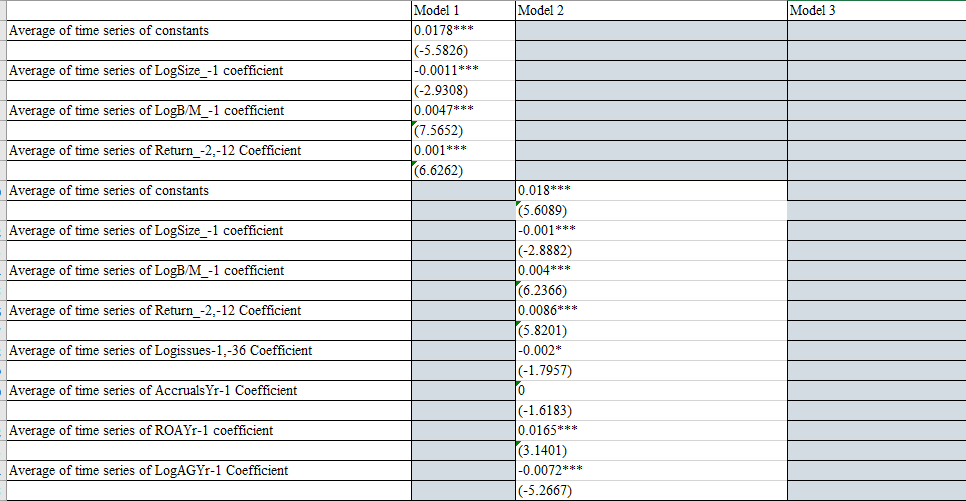

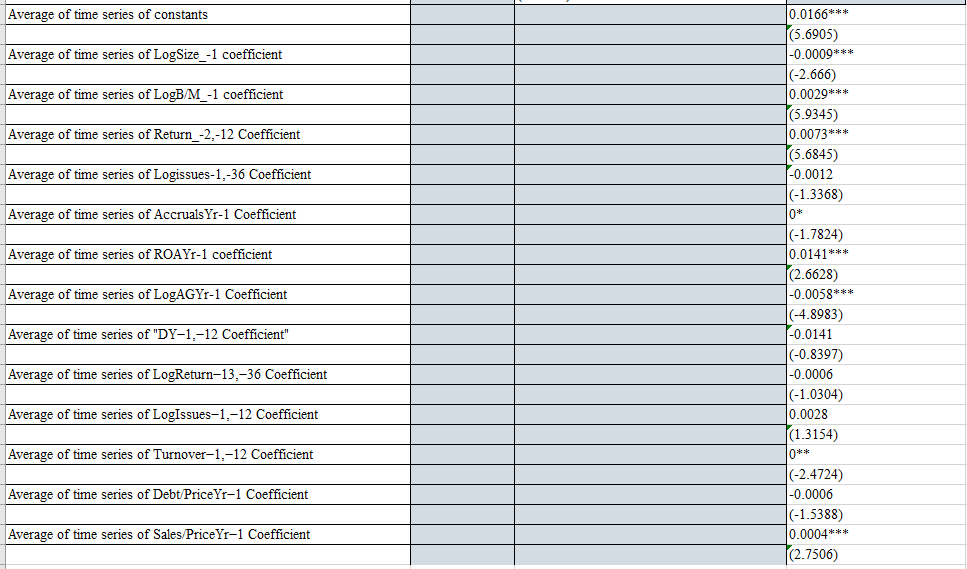

## Question 3: Perform rolling predictions on model 3

In [10]:
### Get original dataset again
DF3 = pd.read_csv(r'D:\SMU\604 Group work\GPEX1set3.csv')

def get_more_than_30(DF):
    counts = DF['Date'].value_counts()
    dates_with_more_than_30_data = counts[counts >= 30].index
    filtered_df = DF['Date'].isin(dates_with_more_than_30_data)
    DF = DF[filtered_df]
    return DF

DF3 = get_more_than_30(DF3)
DF3['Date'].value_counts().tail()

### To adjust return if neccessary
DF3['Return'] = DF3['Return']/100

### Get all the betas (Coefficients)
betas = pd.read_csv(r'D:\SMU\604 Group work\Q1_model3.csv')

betas_df = betas.iloc[:,:-2]

### Define ymonths, which makes rollinglife easier : )

def get_estimated_betas(betas):
    
    def get_year(string):
        return string[0:4]
    def get_month(string):
        return string[5:7]
    
    years = betas['Date'].apply(get_year)
    months = betas['Date'].apply(get_month)

    betas['ymonth'] = years + months
    
    # calculate rolling averages for each column using a window of size 2
    rolling_beta_df = betas.rolling(window=120).mean()
    rolling_beta_df = rolling_beta_df.dropna()
    
    rolling_beta_df = rolling_beta_df.reset_index(drop=True)
    rolling_beta_df['window_start_ymonth'] = betas['ymonth'][:-119]
    
    # We do not need the last window because it is forcasting 2021.04
    rolling_beta_df = rolling_beta_df.head(496)
    
    before_window_forcasted_ymonth = betas['ymonth'][119:].reset_index(drop=True)
    rolling_beta_df['one_month_before_forcasting'] = before_window_forcasted_ymonth
    
    return rolling_beta_df

rolling_betas = get_estimated_betas(betas_df)

### Then calculate predicted value for each firm in each month
### Prepare DF3 as firms data
### Get ymonth for firms data
def get_year(string):
    return string[0:4]
def get_month(string):
    return string[5:7]

years = DF3['Date'].apply(get_year)
months = DF3['Date'].apply(get_month)

DF3['ymonth'] = years + months
DF3.rename(columns={'ymonth': 'one_month_before_forcasting'}, inplace=True)

### Prepare rolling_betas' dataset
rolling_betas = rolling_betas.drop('ymonth',axis=1)

### Change estimated coefficients' names to differenciate
rolling_betas.rename(columns={'Constant':'Constant_', 'LogSize_-1':'LogSize_-1_', 'LogB/M_-1':'LogB/M_-1_', 'Return_-2,-12':'Return_-2,-12_',
       'LogIssues_-1,-36':'LogIssues_-1,-36_', 'Accruals_Yr-1':'Accruals_Yr-1_', 'ROA_Yr-1':'ROA_Yr-1_', 'LogAG_Yr-1':'LogAG_Yr-1_',
       'DY_-1,-12':'DY_-1,-12_', 'LogReturn_-13,-36':'LogReturn_-13,-36_', 'LogIssues_-1,-12':'LogIssues_-1,-12_', 'Turnover_-1,-12':'Turnover_-1,-12_',
       'Debt/Price_Yr-1':'Debt/Price_Yr-1_', 'Sales/Price_Yr-1':'Sales/Price_Yr-1_'}, inplace=True)

### Merge two datasets
all_we_need_for_Q3 = pd.merge(rolling_betas, DF3, on='one_month_before_forcasting')

### Compute results
for i in all_we_need_for_Q3:
    all_we_need_for_Q3['Predicted Return'] = all_we_need_for_Q3['Constant_'] + \
    all_we_need_for_Q3['LogSize_-1']*all_we_need_for_Q3['LogSize_-1_'] + \
    all_we_need_for_Q3['LogB/M_-1']*all_we_need_for_Q3['LogB/M_-1_'] + \
    all_we_need_for_Q3['Return_-2,-12']*all_we_need_for_Q3['Return_-2,-12_'] + \
    all_we_need_for_Q3['LogIssues_-1,-36']*all_we_need_for_Q3['LogIssues_-1,-36_'] + \
    all_we_need_for_Q3['Accruals_Yr-1']*all_we_need_for_Q3['Accruals_Yr-1_'] + \
    all_we_need_for_Q3['ROA_Yr-1']*all_we_need_for_Q3['ROA_Yr-1_'] + \
    all_we_need_for_Q3['LogAG_Yr-1']*all_we_need_for_Q3['LogAG_Yr-1_'] + \
    all_we_need_for_Q3['DY_-1,-12']*all_we_need_for_Q3['DY_-1,-12_'] + \
    all_we_need_for_Q3['LogReturn_-13,-36']*all_we_need_for_Q3['LogReturn_-13,-36_'] + \
    all_we_need_for_Q3['LogIssues_-1,-12']*all_we_need_for_Q3['LogIssues_-1,-12_'] + \
    all_we_need_for_Q3['Turnover_-1,-12']*all_we_need_for_Q3['Turnover_-1,-12_'] + \
    all_we_need_for_Q3['Debt/Price_Yr-1']*all_we_need_for_Q3['Debt/Price_Yr-1_'] + \
    all_we_need_for_Q3['Sales/Price_Yr-1']*all_we_need_for_Q3['Sales/Price_Yr-1_']
    
all_we_need_for_Q3['Actual Return lag'] = all_we_need_for_Q3['Return']

### In this dataset, returns are current returns, but we need real rerurns for next month
answer_for_Q3 = all_we_need_for_Q3.loc[:, ['Date', 'GVKEY', 'Actual Return lag', 'Predicted Return']]
answer_for_Q3 = answer_for_Q3.rename(columns={'Predicted Return':'Forecast/Predicted Return', 'Date':'Date t-1'})

def next_month_last_day(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    month = date_obj.month
    
    if month == 12:
        month = 1
        year += 1
        day = 31       
    elif month in [2, 4, 6, 7, 9, 11]:
        month += 1
        day = 31
    elif month == 1:
        month += 1
        if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)):
            day = 29
        else:
            day = 28
    else:
        month += 1
        day = 30
    return datetime.date(year, month, day).strftime('%Y-%m-%d')

answer_for_Q3['Date'] = answer_for_Q3['Date t-1'].apply(next_month_last_day)

answer_for_Q3 = answer_for_Q3.reindex(columns=['Date', 'GVKEY', 'Actual Return lag', 'Forecast/Predicted Return'])

### Put real return date in and drop null value
DF3 = DF3.rename(columns={'Return':'Actual Return'})
answer_for_Q3_final = pd.merge(answer_for_Q3, DF3, on=['Date','GVKEY'], how='left').\
    loc[:,['Date','GVKEY','Actual Return', 'Forecast/Predicted Return']].\
    dropna()

### Ouput
answer_for_Q3_final.to_csv(r"D:\SMU\604 Group work\Q3_results.csv", index=False)

answer_for_Q3_final

,Date,GVKEY,Actual Return,Forecast/Predicted Return
0,1980-01-31,1004,0.226695,0.011401
1,1980-01-31,1010,0.211679,0.007148
2,1980-01-31,1020,-0.035714,0.011717
3,1980-01-31,1025,0.201539,0.018524
4,1980-01-31,1040,-0.008547,0.006134
...,...,...,...,...
1205837,2021-03-31,264265,-0.046658,0.009738
1205839,2021-03-31,264416,0.251401,0.011641
1205840,2021-03-31,268208,0.110647,0.014565
1205841,2021-03-31,294524,0.019498,0.007542


## Question 4: Analysis the prediction accuracy and annual strategy returns

Annualized Trading Return: 0.018528459635046346
Total_Accuracy: 0.5379933871163018


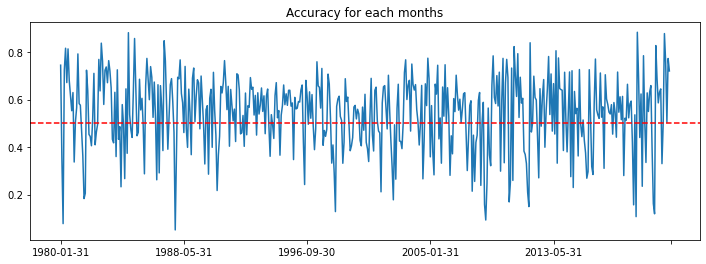

In [11]:
### This is exactly what we got above in Question 3
# Q3_results = pd.read_csv(r'D:\SMU\604 Group work\Q3_results.csv')
Q3_results = answer_for_Q3_final
Temp_DF = Q3_results

### Get trading sign
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

Temp_DF['Sign'] = Temp_DF['Forecast/Predicted Return'].apply(sign)
Temp_DF['Sign'].value_counts()

### Get trading return
Temp_DF['Trade_return'] = Temp_DF['Sign'] * Temp_DF['Actual Return']

grouped = Temp_DF.groupby('GVKEY')['Trade_return'].sum()
total_return = grouped.sum() / len(grouped)

### Get years of trading
start_date = pd.to_datetime(Temp_DF['Date']).min()
end_date = pd.to_datetime(Temp_DF['Date']).max()

years_of_trading = 40+1+2/12
# years_of_trading = (end_date - start_date).days / 365.25

### Get trading return average
annualized_return = (1 + total_return) ** (1 / years_of_trading) - 1
print('Annualized Trading Return: ' + str(annualized_return))

### Compute Accuracy
def sign_1(x):
    if x >= 0:
        return 1
    else:
        return 0

Temp_DF['Correct or not'] = Temp_DF['Trade_return'].apply(sign_1)

### Accuracy for each months
grouped_1 = Temp_DF.groupby('Date')['Correct or not'].mean()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(grouped_1)
ax.axhline(y=0.5, color='r', linestyle='--')
ax.set_title('Accuracy for each months')
ax.set_xticks([0, 100, 200, 300, 400, 495])

### Accuracy for each firms
grouped_2 = Temp_DF.groupby('GVKEY')['Correct or not'].mean()
# print(grouped_2.tail(10))

### Total accuracy
Total_Accuracy = Temp_DF['Correct or not'].mean()
print('Total_Accuracy: ' + str(Total_Accuracy))

## Question 5: Introduce excess-return regression to improve the back-test results

###### Our group members have tried multiple approaches to improve the results. 
###### We have tried Principal component analysis to optimize regression factors; 
###### We also select factors based on result in Question 2, which is to choose those with significant explaining power; 
###### The third approach is that, we adjust coefs of each factor with a weight defined by it's standard error. 
###### The fourth approach is to ues excess return regression, we adjust return to (return - risk free rate).

### We can not put all our works in a file, because it will be too tedious to read and run. Here we only show how we do approach 4 because this approach shows the best performance.

In [12]:
### Get some risk-free rate (1-month Treasury bill for the United States)
DF3 = pd.read_csv(r'D:\SMU\604 Group work\GPEX1set3.csv')

def get_more_than_30(DF):
    counts = DF['Date'].value_counts()
    dates_with_more_than_30_data = counts[counts >= 30].index
    filtered_df = DF['Date'].isin(dates_with_more_than_30_data)
    DF = DF[filtered_df]
    return DF

DF3 = get_more_than_30(DF3)
DF3['Return'] = DF3['Return']/100
# DF3['Date'].value_counts().tail()

start = datetime.datetime(1970, 1, 1)
end = datetime.datetime(2021, 3, 31)

# Get the yield for the 1-month Treasury bill for the United States
risk_free_rate = web.DataReader('DTB3', 'fred', start, end)

# Convert the yield to a monthly rate
risk_free_rate = risk_free_rate.resample('M').last()
risk_free_rate = (1 + risk_free_rate/100)**(1/12) - 1

risk_free_rate = risk_free_rate.reset_index().rename(columns={'DATE': 'Date'})
risk_free_rate['Date'] = risk_free_rate['Date'].dt.strftime('%Y-%m-%d')

### Merge Rf to original dataset for model 3
DF_with_Rf = pd.merge(DF3, risk_free_rate, on='Date')

### Get excess return
risk_free_rate = risk_free_rate.reset_index().rename(columns={'DATE': 'Date'})
DF_with_Rf = DF_with_Rf.rename(columns={'Return':'Raw_Return', 'DTB3':'Risk-free rate'})
DF_with_Rf['Return'] = DF_with_Rf['Raw_Return'] - DF_with_Rf['Risk-free rate']

### Estimate coefs
def get_question1_params_for_one_row(DF, date, columns):
    DF_temp = DF[DF['Date']==date]
    
    y = DF_temp['Return']
    X = DF_temp[['LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    Date = date
    
    D = []
    D.append(Date)
    
    Number_of_Firms_or_Obs = len(y)
    N = []
    N.append(Number_of_Firms_or_Obs)
    
    R = []
    R.append(results.rsquared_adj)
    
    List_of_params = D + list(results.params) + R + N
    DF_params = pd.DataFrame([List_of_params], columns=Columns)
    
    return DF_params

Columns = ['Date', 'Constant','LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1','Adj Rsqr','Number of Firms or Obs']


for i in np.unique(DF3['Date']):
    date=i
    df_i = get_question1_params_for_one_row(DF3, date, columns = Columns)
    
    if i == np.unique(DF3['Date'])[0]:
        question1_params_for_model = df_i
    else:
        question1_params_for_model = pd.concat([question1_params_for_model, df_i], ignore_index=True)
        
# Save the DataFrame to a CSV file
question1_params_for_model.to_csv(r"D:\SMU\604 Group work\Q1_model3_excess_return_adjustment.csv", index=False)


### Do rolling average of coefs and get predicted excess returns
### Get all the betas
betas = pd.read_csv(r'D:\SMU\604 Group work\Q1_model3_excess_return_adjustment.csv')
betas_df = betas.iloc[:,:-2]

### Define ymonths, which makes rollinglife easier : )
def get_estimated_betas(betas):
    
    def get_year(string):
        return string[0:4]
    def get_month(string):
        return string[5:7]
    
    years = betas['Date'].apply(get_year)
    months = betas['Date'].apply(get_month)

    betas['ymonth'] = years + months
    
    # calculate rolling averages for each column using a window of size 2
    rolling_beta_df = betas.rolling(window=120).mean()
    rolling_beta_df = rolling_beta_df.dropna()
    
    rolling_beta_df = rolling_beta_df.reset_index(drop=True)
    rolling_beta_df['window_start_ymonth'] = betas['ymonth'][:-119]
    
    # We do not need the last window because it is forcasting 2021.04
    rolling_beta_df = rolling_beta_df.head(496)
    
    before_window_forcasted_ymonth = betas['ymonth'][119:].reset_index(drop=True)
    rolling_beta_df['one_month_before_forcasting'] = before_window_forcasted_ymonth
    
    return rolling_beta_df

rolling_betas = get_estimated_betas(betas_df)

### Then calculate predicted value for each firm in each month
### Prepare DF3 as firms data
def get_year(string):
    return string[0:4]
def get_month(string):
    return string[5:7]

years = DF3['Date'].apply(get_year)
months = DF3['Date'].apply(get_month)

DF3['ymonth'] = years + months
DF3.rename(columns={'ymonth': 'one_month_before_forcasting'}, inplace=True)

### Prepare rolling_betas' dataset
rolling_betas = rolling_betas.drop('ymonth',axis=1)

rolling_betas.rename(columns={'Constant':'Constant_', 'LogSize_-1':'LogSize_-1_', 'LogB/M_-1':'LogB/M_-1_', 'Return_-2,-12':'Return_-2,-12_',
       'LogIssues_-1,-36':'LogIssues_-1,-36_', 'Accruals_Yr-1':'Accruals_Yr-1_', 'ROA_Yr-1':'ROA_Yr-1_', 'LogAG_Yr-1':'LogAG_Yr-1_',
       'DY_-1,-12':'DY_-1,-12_', 'LogReturn_-13,-36':'LogReturn_-13,-36_', 'LogIssues_-1,-12':'LogIssues_-1,-12_', 'Turnover_-1,-12':'Turnover_-1,-12_',
       'Debt/Price_Yr-1':'Debt/Price_Yr-1_', 'Sales/Price_Yr-1':'Sales/Price_Yr-1_'}, inplace=True)

### Merge two datasets
all_we_need_for_Q3 = pd.merge(rolling_betas, DF3, on='one_month_before_forcasting')

### Compute results
for i in all_we_need_for_Q3:
    all_we_need_for_Q3['Predicted Return'] = all_we_need_for_Q3['Constant_'] + \
    all_we_need_for_Q3['LogSize_-1']*all_we_need_for_Q3['LogSize_-1_'] + \
    all_we_need_for_Q3['LogB/M_-1']*all_we_need_for_Q3['LogB/M_-1_'] + \
    all_we_need_for_Q3['Return_-2,-12']*all_we_need_for_Q3['Return_-2,-12_'] + \
    all_we_need_for_Q3['LogIssues_-1,-36']*all_we_need_for_Q3['LogIssues_-1,-36_'] + \
    all_we_need_for_Q3['Accruals_Yr-1']*all_we_need_for_Q3['Accruals_Yr-1_'] + \
    all_we_need_for_Q3['ROA_Yr-1']*all_we_need_for_Q3['ROA_Yr-1_'] + \
    all_we_need_for_Q3['LogAG_Yr-1']*all_we_need_for_Q3['LogAG_Yr-1_'] + \
    all_we_need_for_Q3['DY_-1,-12']*all_we_need_for_Q3['DY_-1,-12_'] + \
    all_we_need_for_Q3['LogReturn_-13,-36']*all_we_need_for_Q3['LogReturn_-13,-36_'] + \
    all_we_need_for_Q3['LogIssues_-1,-12']*all_we_need_for_Q3['LogIssues_-1,-12_'] + \
    all_we_need_for_Q3['Turnover_-1,-12']*all_we_need_for_Q3['Turnover_-1,-12_'] + \
    all_we_need_for_Q3['Debt/Price_Yr-1']*all_we_need_for_Q3['Debt/Price_Yr-1_'] + \
    all_we_need_for_Q3['Sales/Price_Yr-1']*all_we_need_for_Q3['Sales/Price_Yr-1_']
    
all_we_need_for_Q3['Actual Return lag'] = all_we_need_for_Q3['Return']

### In this dataset, returns are current returns, but we need real rerurns for next month
answer_for_Q3 = all_we_need_for_Q3.loc[:, ['Date', 'GVKEY', 'Actual Return lag', 'Predicted Return']]
answer_for_Q3 = answer_for_Q3.rename(columns={'Predicted Return':'Forecast/Predicted Return', 'Date':'Date t-1'})

import datetime

def next_month_last_day(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    month = date_obj.month
    
    if month == 12:
        month = 1
        year += 1
        day = 31       
    elif month in [2, 4, 6, 7, 9, 11]:
        month += 1
        day = 31
    elif month == 1:
        month += 1
        if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)):
            day = 29
        else:
            day = 28
    else:
        month += 1
        day = 30
    return datetime.date(year, month, day).strftime('%Y-%m-%d')

answer_for_Q3['Date'] = answer_for_Q3['Date t-1'].apply(next_month_last_day)

answer_for_Q3 = answer_for_Q3.reindex(columns=['Date', 'GVKEY', 'Actual Return lag', 'Forecast/Predicted Return'])

### Put real return date in and drop null value
DF3 = DF3.rename(columns={'Return':'Actual Return'})

answer_for_Q3_final = pd.merge(answer_for_Q3, DF3, on=['Date','GVKEY'], how='left').\
    loc[:,['Date','GVKEY','Actual Return', 'Forecast/Predicted Return']].\
    dropna()

### Save the output
answer_for_Q3_final.to_csv(r"D:\SMU\604 Group work\Q3_results_excess_return_adjustment.csv", index=False)


### Add risk-free rate back and compute accuracy
Q3_results = pd.read_csv(r'D:\SMU\604 Group work\Q3_results_excess_return_adjustment.csv')
Q3_results = pd.merge(Q3_results, risk_free_rate, on='Date')
Q3_results['Actual Return'] = Q3_results['Actual Return'] + Q3_results['DTB3']
Q3_results['Forecast/Predicted Return'] = Q3_results['Forecast/Predicted Return'] + Q3_results['DTB3']

Temp_DF = Q3_results

### Get trading sign
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

Temp_DF['Sign'] = Temp_DF['Forecast/Predicted Return'].apply(sign)
Temp_DF['Sign'].value_counts()

### Get trading return
Temp_DF['Trade_return'] = Temp_DF['Sign'] * Temp_DF['Actual Return']

grouped = Temp_DF.groupby('GVKEY')['Trade_return'].sum()
total_return = grouped.sum() / len(grouped)

### Get years of trading
start_date = pd.to_datetime(Temp_DF['Date']).min()
end_date = pd.to_datetime(Temp_DF['Date']).max()

years_of_trading = 40+1+2/12
# years_of_trading = (end_date - start_date).days / 365.25

### Get trading return average
annualized_return = (1 + total_return) ** (1 / years_of_trading) - 1

### Results we got before
print('Trading return before excess return adjustment: ' + '0.018528459635046346')

print('Trading return after excess return adjustment: ' + str(annualized_return))

### Compute Accuracy
def sign_1(x):
    if x >= 0:
        return 1
    else:
        return 0

Temp_DF['Correct or not'] = Temp_DF['Trade_return'].apply(sign_1)
Total_accuracy = Temp_DF['Correct or not'].mean()

### Results we got before
print('Total accuracy before excess return adjustment: ' + '0.5379933871163018')

print('Total accuracy after excess return adjustment: ' + str(Total_accuracy))

Trading return before excess return adjustment: 0.018528459635046346
Trading return after excess return adjustment: 0.022129217248503696
Total accuracy before excess return adjustment: 0.5379933871163018
Total accuracy after excess return adjustment: 0.5432983590567347


## End